In [1]:
import sys
print(sys.path)
sys.path.append("../lqr")
from lqr_recursion import LqrRecursion
import chainer
import numpy as np
import matplotlib.pyplot as plt

['/Users/i19_arahata/Program/chainer-mpc/examples', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python37.zip', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7/lib-dynload', '/Users/i19_arahata/.pyenv/versions/3.7.2/lib/python3.7', '', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7/site-packages', '/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7/site-packages/IPython/extensions', '/Users/i19_arahata/.ipython']


/Users/i19_arahata/.local/share/virtualenvs/chainer-mpc-dl9ARfgC/lib/python3.7/site-packages/chainer/_environment_check.py:41: UserWarning: Accelerate has been detected as a NumPy backend library.
vecLib, which is a part of Accelerate, is known not to work correctly with Chainer.
We recommend using other BLAS libraries such as OpenBLAS.
For details of the issue, please see
https://docs.chainer.org/en/stable/tips.html#mnist-example-does-not-converge-in-cpu-mode-on-mac-os-x.

Please be aware that Mac OS X is not an officially supported OS.

  ''')  # NOQA


In [2]:
T =51
f = None
n_state =3
n_ctrl =1
n_sc = n_ctrl +n_state
F =chainer.Variable(np.array([(np.array([[
    1.0,0, 0, 1],
    [1,1.0,0,0],
   [0, 1, 1, 0]])) for i in range(T)])).reshape(T,1,n_state,n_sc,)
c = chainer.Variable(np.array([(np.array([0,0,0.0,0]).T) for i in range(T)])).reshape(T,1,n_sc,)
_C = np.array([np.array([[0,0 ,0,0],[0,0,0,0],[0,0,1.0,0],[0,0,0,1]]) for i in range(T-1)])
_C = np.append(_C , np.array([[0,0 ,0,0],[0,0,0,0],[0,0,1.0,0],[0,0,0,0.00000000000001]]))
C = chainer.Variable(_C).reshape(T,1,n_sc, n_sc)
x_init = chainer.Variable(np.array([0.5428, 0.7633,0.3504])).reshape(1,n_state)

In [3]:
C

variable([[[[0.e+00, 0.e+00, 0.e+00, 0.e+00],
            [0.e+00, 0.e+00, 0.e+00, 0.e+00],
            [0.e+00, 0.e+00, 1.e+00, 0.e+00],
            [0.e+00, 0.e+00, 0.e+00, 1.e+00]]],


          [[[0.e+00, 0.e+00, 0.e+00, 0.e+00],
            [0.e+00, 0.e+00, 0.e+00, 0.e+00],
            [0.e+00, 0.e+00, 1.e+00, 0.e+00],
            [0.e+00, 0.e+00, 0.e+00, 1.e+00]]],


          [[[0.e+00, 0.e+00, 0.e+00, 0.e+00],
            [0.e+00, 0.e+00, 0.e+00, 0.e+00],
            [0.e+00, 0.e+00, 1.e+00, 0.e+00],
            [0.e+00, 0.e+00, 0.e+00, 1.e+00]]],


          [[[0.e+00, 0.e+00, 0.e+00, 0.e+00],
            [0.e+00, 0.e+00, 0.e+00, 0.e+00],
            [0.e+00, 0.e+00, 1.e+00, 0.e+00],
            [0.e+00, 0.e+00, 0.e+00, 1.e+00]]],


          [[[0.e+00, 0.e+00, 0.e+00, 0.e+00],
            [0.e+00, 0.e+00, 0.e+00, 0.e+00],
            [0.e+00, 0.e+00, 1.e+00, 0.e+00],
            [0.e+00, 0.e+00, 0.e+00, 1.e+00]]],


          [[[0.e+00, 0.e+00, 0.e+00, 0.e+00],
            [0

In [4]:
test = LqrRecursion(x_init,C,c,F,f,T,n_state,n_ctrl)

In [42]:
Ks, ks = test.backward()

(0, 51)

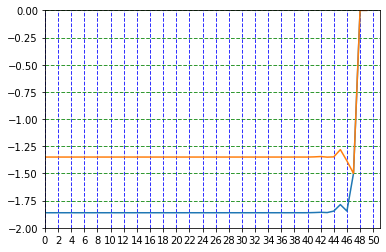

In [43]:
k1 =[]
k2 = []
fig, ax = plt.subplots()
for i in range(T-1):
    k1.append(Ks[i][0][0][0].data)
    k2.append(Ks[i][0][0][1].data)
major_ticks = np.arange(0,T, 2)
ax.grid(which = "major", axis = "x", color = "blue", alpha = 0.8,
        linestyle = "--", linewidth = 1)
ax.grid(which = "major", axis = "y", color = "green", alpha = 0.8,
        linestyle = "--", linewidth = 1)
ax.set_xticks(major_ticks)            
ax.set_ylim(-0.5, 1.2)
ax.plot(k1)
ax.plot(k2)
ax.set_ylim(-2, 0)
ax.set_xlim(0,T)

In [44]:
x,u = test.solve_recursion()

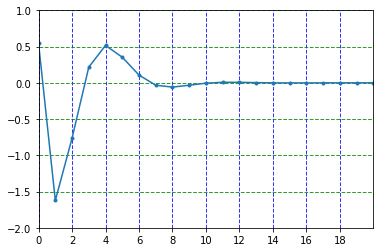

In [45]:
us = []
for i in range(T):
    us.append(x[i][0][0].data)
    
fig, ax = plt.subplots()
ax.grid(which = "major", axis = "x", color = "blue", alpha = 0.8,
        linestyle = "--", linewidth = 1)

# y軸に目盛線を設定
ax.grid(which = "major", axis = "y", color = "green", alpha = 0.8,
        linestyle = "--", linewidth = 1)

major_ticks = np.arange(0, 20, 2)                                              
ax.set_xticks(major_ticks)                                                       
ax.set_ylim(-2, 1)
ax.set_xlim(0, 20)
ax.plot(us, marker='.')
plt.show()

In [46]:
Ks

[variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.358887

In [47]:
Ks

[variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.35888729]]]),
 variable([[[-1.86152282, -1.34921019, -0.358887

In [48]:
len(Ks)

51

In [49]:
x

variable([[[ 5.42800000e-01,  7.63300000e-01,  3.50400000e-01]],

          [[-1.62324083e+00,  1.30610000e+00,  1.11370000e+00]],

          [[-7.63437193e-01, -3.17140831e-01,  2.41980000e+00]],

          [[ 2.17172740e-01, -1.08057802e+00,  2.10265917e+00]],

          [[ 5.16209963e-01, -8.63405283e-01,  1.02208114e+00]],

          [[ 3.53376615e-01, -3.47195320e-01,  1.58675861e-01]],

          [[ 1.07050698e-01,  6.18129541e-03, -1.88519459e-01]],

          [[-3.29092479e-02,  1.13231993e-01, -1.82338163e-01]],

          [[-5.89828421e-02,  8.03227452e-02, -6.91061702e-02]],

          [[-3.27558761e-02,  2.13399031e-02,  1.12165750e-02]],

          [[-4.59756627e-03, -1.14159730e-02,  3.25564780e-02]],

          [[ 7.67934926e-03, -1.60135393e-02,  2.11405050e-02]],

          [[ 7.40263729e-03, -8.33419004e-03,  5.12696573e-03]],

          [[ 3.02703038e-03, -9.31552747e-04, -3.20722431e-03]],

          [[-1.99963242e-04,  2.09547764e-03, -4.13877706e-03]],

          